In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

data = pd.read_csv('capstone_train.csv')
test_data=pd.read_csv('capstone_test.csv')

### Data Analysis

In [2]:
data.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,Assassin vine
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,Assassin vine
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,Ascomoid
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,Assassin vine
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,Assassin vine


In [3]:
test_data.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,3258,225,2,631,148,1739,217,240.0,161,2340,31,3,Ascomoid
1,3033,229,24,552,341,2277,176,253.0,206,1318,13,3,Assassin vine
2,2838,355,20,108,21,674,183,201.0,152,418,31,3,Assassin vine
3,3098,122,10,242,76,4821,238,232.0,124,268,29,1,Assassin vine
4,3221,189,24,153,41,2121,214,250.0,157,1423,33,3,Ascomoid


In [4]:
print(data.shape)
print(test_data.shape)

(464809, 13)
(116203, 13)


In [5]:
data.dtypes

Heigh_From_Sea_Level                   int64
Aspect                                 int64
Slope                                  int64
Distance_To_Water_Source               int64
Standing_Distance_To_Water_Source      int64
Distance_To_Road                       int64
Shadow_In_Morning                      int64
Shadow_In_Midday                     float64
Shadow_In_Evening                      int64
Distance_To_Fire                       int64
Turf                                   int64
Neighbourhood_Type                     int64
Plant_Type                            object
dtype: object

Imputing missing values

In [6]:
data.isnull().sum()

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     93033
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64

In [7]:
test_data.isnull().sum()

Heigh_From_Sea_Level                     0
Aspect                                   0
Slope                                    0
Distance_To_Water_Source                 0
Standing_Distance_To_Water_Source        0
Distance_To_Road                         0
Shadow_In_Morning                        0
Shadow_In_Midday                     23079
Shadow_In_Evening                        0
Distance_To_Fire                         0
Turf                                     0
Neighbourhood_Type                       0
Plant_Type                               0
dtype: int64

It is clear that in both Training data and test data, Attribute Shadow_In_Midday has Null values 

In [8]:
data.nunique()

Heigh_From_Sea_Level                 1966
Aspect                                361
Slope                                  66
Distance_To_Water_Source              545
Standing_Distance_To_Water_Source     686
Distance_To_Road                     5744
Shadow_In_Morning                     206
Shadow_In_Midday                      177
Shadow_In_Evening                     255
Distance_To_Fire                     5799
Turf                                   40
Neighbourhood_Type                      4
Plant_Type                              7
dtype: int64

Analyzing Plant_type:

In [9]:
print(data['Plant_Type'].describe())
print("\n\n")
print(data['Plant_Type'].value_counts())

count            464809
unique                7
top       Assassin vine
freq             226705
Name: Plant_Type, dtype: object



Assassin vine    226705
Ascomoid         169487
Basidirond        28488
Myconid:          16416
Kelpie            13931
Hangman tree       7598
Dark tree          2184
Name: Plant_Type, dtype: int64


Again it is quite clear that the distribution is not equal.

### Label encoding for plant type

In [10]:
x={'Assassin vine':1,'Ascomoid':2,'Basidirond':3,'Kelpie':4,'Myconid:':5,'Hangman tree':6,'Dark tree':7}
data['Plant_Type']=data['Plant_Type'].str.strip().map(x)
test_data['Plant_Type']=test_data['Plant_Type'].str.strip().map(x)

In [11]:
data.sample(5)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
448246,3101,154,16,108,6,819,238,NaN,126,1950,29,1,2
368799,3198,205,13,108,23,2182,212,NaN,172,454,32,3,2
197785,2871,34,3,30,1,1883,219,232.0,149,2387,20,1,1
167037,2972,322,9,0,0,2561,198,232.0,173,755,21,3,2
8642,3160,107,13,212,28,446,241,224.0,110,5481,23,2,2


# Visualization

Correlation Matrix to determine relationship between attributes

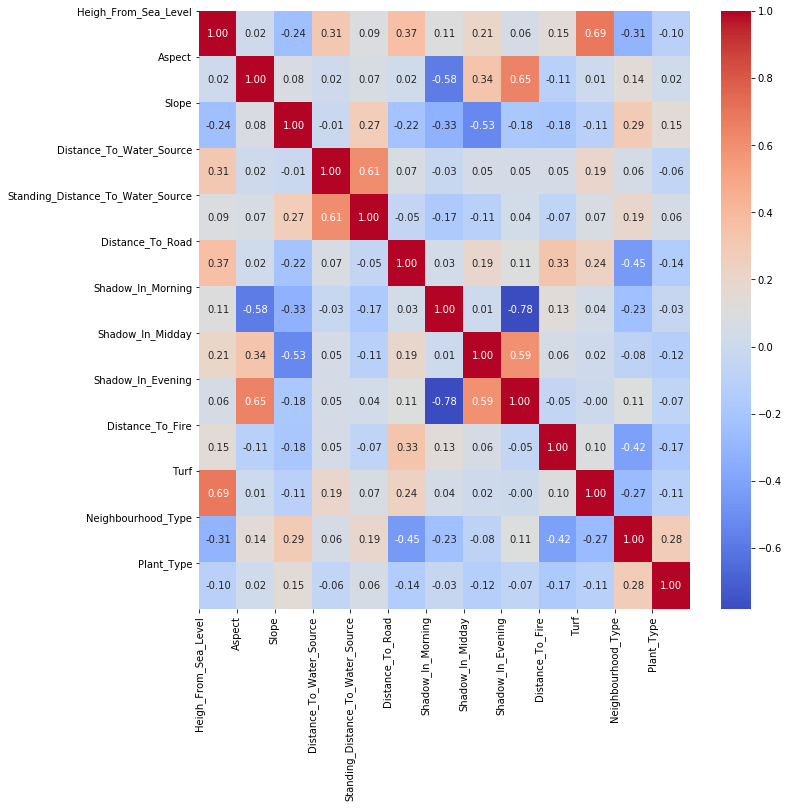

In [12]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(11, 11))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Box plot of each attribute 

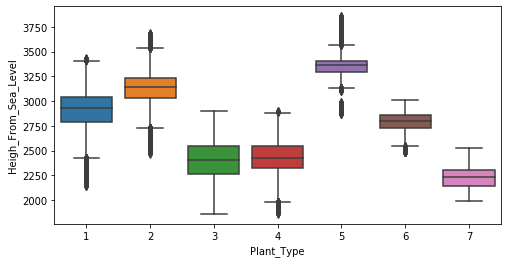

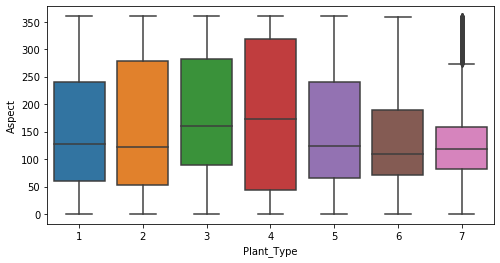

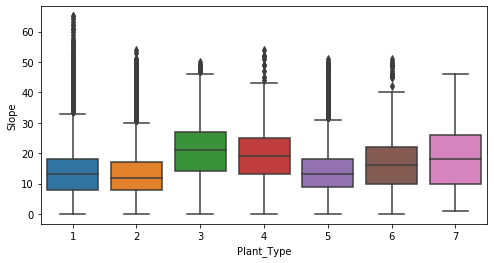

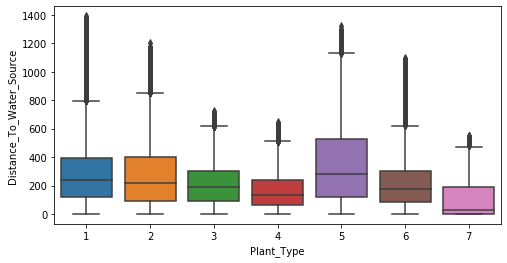

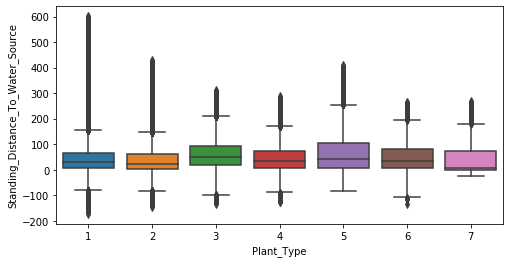

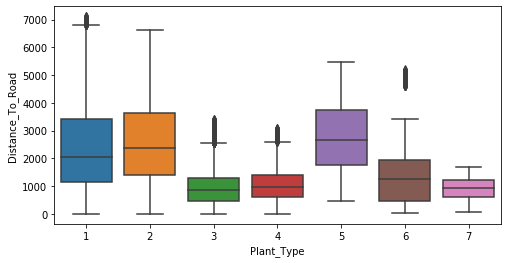

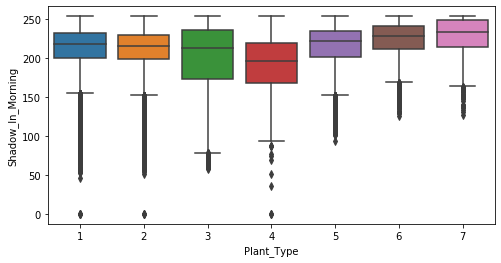

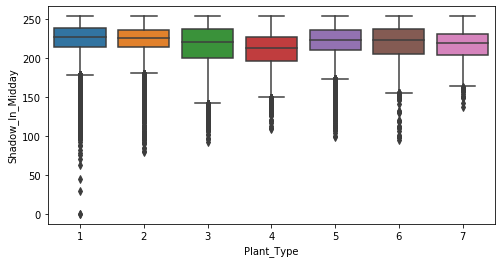

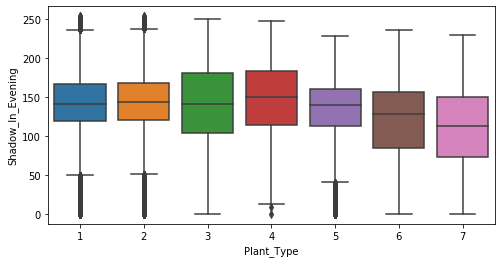

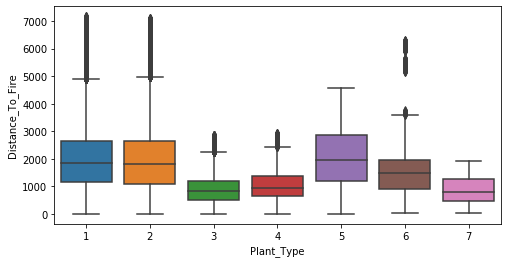

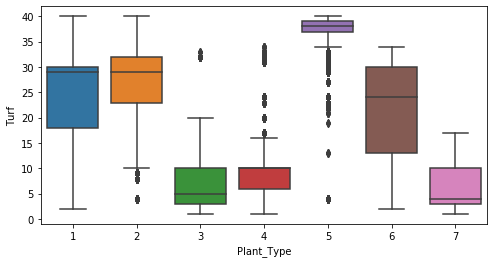

In [13]:
Attributes=data.loc[:,'Heigh_From_Sea_Level':'Turf']
data['Plant_Type']=data['Plant_Type'].astype('category') 

for i, col in enumerate(Attributes.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Plant_Type'], y=col, data=data)

#### Replacing missing values in Shadow_In_Midday by mean

In [14]:
data['Shadow_In_Midday'].fillna(data['Shadow_In_Midday'].mean(),inplace=True)
test_data['Shadow_In_Midday'].fillna(test_data['Shadow_In_Midday'].mean(),inplace=True)

In [15]:
data.isnull().sum()

Heigh_From_Sea_Level                 0
Aspect                               0
Slope                                0
Distance_To_Water_Source             0
Standing_Distance_To_Water_Source    0
Distance_To_Road                     0
Shadow_In_Morning                    0
Shadow_In_Midday                     0
Shadow_In_Evening                    0
Distance_To_Fire                     0
Turf                                 0
Neighbourhood_Type                   0
Plant_Type                           0
dtype: int64

### 3rd Problem Statement where we need to determine how plants are related to Sunlight and  availability of water

In [16]:
data['euclidean_distance'] = (data['Distance_To_Water_Source']**2+data['Standing_Distance_To_Water_Source']**2)**0.5
data['euclidean_distance'].sample(5)

98005     424.471436
289442    291.290233
173259    262.488095
229378    417.808569
130921     30.149627
Name: euclidean_distance, dtype: float64

In [17]:
data['average_shadow']=((255*3-(data['Shadow_In_Morning']+data['Shadow_In_Midday']+data['Shadow_In_Evening']))/3)
data['average_shadow'].sample(5)

428966    66.000000
47725     66.666667
380206    80.333333
308538    68.562720
272339    54.562720
Name: average_shadow, dtype: float64

Plant_Type
1    61.090539
2    61.913353
3    68.358751
4    70.574745
5    63.655486
6    66.549801
7    69.046213
Name: average_shadow, dtype: float64


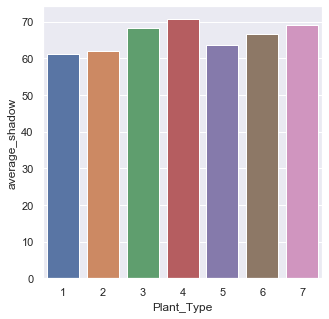

In [18]:
print(data.groupby('Plant_Type')['average_shadow'].mean())
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x=data.groupby('Plant_Type')['average_shadow'].mean().index, y=data.groupby('Plant_Type')['average_shadow'].mean())

Plant_Type
1    285.961125
2    276.065620
3    222.569941
4    167.883424
5    365.800204
6    222.846995
7    116.195488
Name: euclidean_distance, dtype: float64


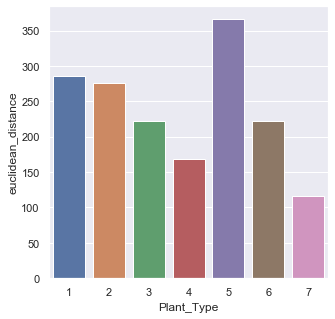

In [19]:
sns.barplot(x=data.groupby('Plant_Type')['euclidean_distance'].mean().index, y=data.groupby('Plant_Type')['euclidean_distance'].mean())
print(data.groupby('Plant_Type')['euclidean_distance'].mean())

In [20]:
cluster = data.filter(['euclidean_distance', 'average_shadow','Plant_Type'])

In [21]:
cluster.head()

,euclidean_distance,average_shadow,Plant_Type
0,242.074369,62.333333,1
1,731.631055,61.666667,1
2,636.180006,49.666667,2
3,155.241747,46.666667,1
4,583.781637,51.333333,1


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cluster[['euclidean_distance', 'average_shadow']] = scaler.fit_transform(cluster[['euclidean_distance', 'average_shadow']])

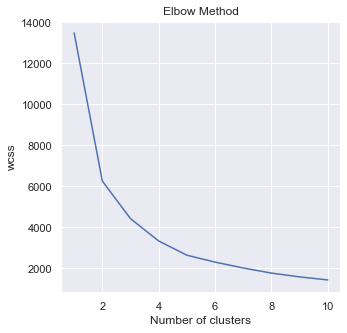

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(cluster[['euclidean_distance', 'average_shadow']])
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

From the above scree plot, 4 clusters are sufficient.

Text(0, 0.5, 'average_shadow')

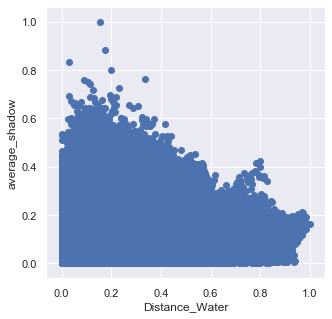

In [24]:
plt.scatter(cluster.euclidean_distance,cluster.average_shadow)
plt.xlabel('Distance_Water')
plt.ylabel('average_shadow')

In [25]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(cluster[['euclidean_distance','average_shadow']])



In [26]:
cluster['Type']=y_predicted

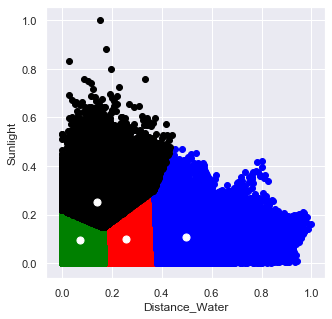

In [27]:
df1 = cluster[cluster.Type==0]
df2 = cluster[cluster.Type==1]
df3 = cluster[cluster.Type==2]
df4 = cluster[cluster.Type==3]


plt.scatter(df1.euclidean_distance,df1['average_shadow'],color='red')
plt.scatter(df2.euclidean_distance,df2['average_shadow'],color='green')
plt.scatter(df3.euclidean_distance,df3['average_shadow'],color='blue')
plt.scatter(df4.euclidean_distance,df4['average_shadow'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='white')
plt.xlabel('Distance_Water')
plt.ylabel('Sunlight')
plt.show()


In [28]:
print(df1['Plant_Type'].value_counts().sum())
print(df2['Plant_Type'].value_counts().sum())
print(df3['Plant_Type'].value_counts().sum())
print(df4['Plant_Type'].value_counts().sum())

149201
198895
57754
58959


Therefore,Less sunglight and less water are prefered

In [29]:
data=data.drop(['euclidean_distance','average_shadow'],axis=1)

In [30]:
data.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,87,10,234,62,3700,235,224.0,119,2751,29,1,1
1,3021,283,31,630,372,2155,122,224.0,234,1519,13,3,1
2,3357,164,14,618,151,1410,232,244.0,140,1866,32,3,2
3,2787,272,16,150,40,2024,176,243.0,206,957,31,3,1
4,3011,135,2,576,95,5550,222,238.0,151,1524,29,1,1


### Imputation and Removal of Outliers using Skewness and Applied Transformations

In [31]:
skew = data.skew().abs()
skew.sort_values(ascending = False)

Plant_Type                           2.002707
Standing_Distance_To_Water_Source    1.793613
Distance_To_Fire                     1.288951
Shadow_In_Midday                     1.186293
Shadow_In_Morning                    1.181143
Distance_To_Water_Source             1.140487
Heigh_From_Sea_Level                 0.817019
Slope                                0.789069
Distance_To_Road                     0.711927
Turf                                 0.704944
Aspect                               0.403099
Shadow_In_Evening                    0.274835
Neighbourhood_Type                   0.091092
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

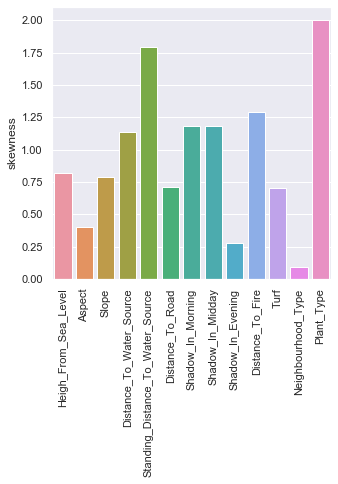

In [32]:
skewDf = pd.DataFrame(skew, columns = ['skewness'])
sns.barplot(x=skewDf.index, y='skewness', data = skewDf)
plt.xticks(rotation=90)

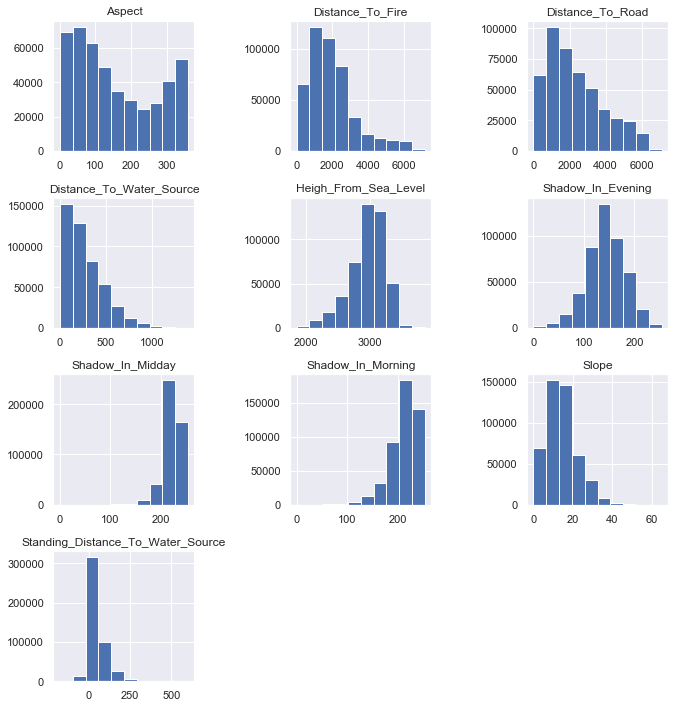

In [33]:
data.iloc[:,:10].hist()    
plt.tight_layout(rect=(0, 0, 2, 2)) 

#### As we can,most of the attributes are either left skewed or right skewed. So we apply Cuberoot on  attributes to reduce the skewness and then remove the outliers for each attribute.

#### Height from sea level

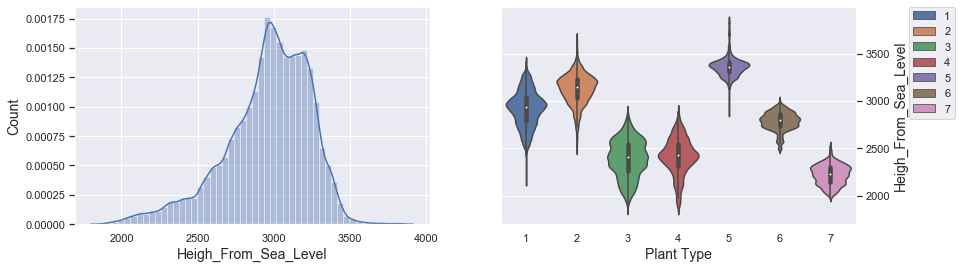

In [34]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Heigh_From_Sea_Level'], ax = axes[0])
axes[0].set_xlabel('Heigh_From_Sea_Level', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Heigh_From_Sea_Level', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Heigh_From_Sea_Level', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [35]:
data["Heigh_From_Sea_Level"].skew()

-0.8170188901728388

In [36]:
np.cbrt(data["Heigh_From_Sea_Level"]+100).skew()

-1.0262149831865832

As we can see the skew is increasing if we apply cube root, so we do not apply skew on the data. 

-> Percentage of data loss=  2.668192741534695


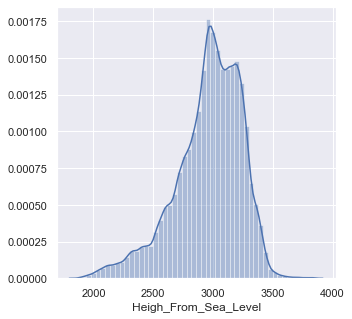

In [37]:
q1, q2, q3 = data["Heigh_From_Sea_Level"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Heigh_From_Sea_Level"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Heigh_From_Sea_Level"]>Max]])
no_outlier_data = data[data["Heigh_From_Sea_Level"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Heigh_From_Sea_Level"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Heigh_From_Sea_Level"])*100/len(data["Heigh_From_Sea_Level"]))
sns.distplot(data['Heigh_From_Sea_Level'],)

In [38]:
data = no_outlier_data.copy()

#### Aspect 

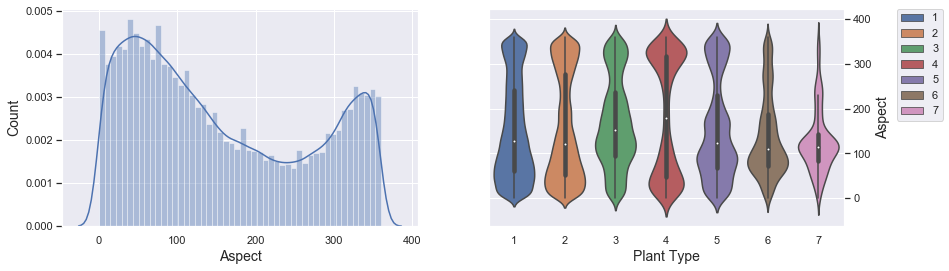

In [39]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Aspect'], ax = axes[0])
axes[0].set_xlabel('Aspect', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Aspect', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Aspect', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [40]:
data["Aspect"].skew()

0.4154094586337909

In [41]:
np.cbrt(data["Aspect"]+100).skew() 

0.11621755430293634

As we can see, Skew reduces so we apply the transformation function on data

In [42]:
data["Aspect"] = np.cbrt(data["Aspect"]+100)

-> Percentage of data loss=  0.0


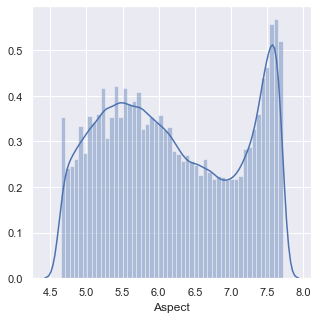

In [43]:
q1, q2, q3 = data["Aspect"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Aspect"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Aspect"]>Max]])
no_outlier_data = data[data["Aspect"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Aspect"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Aspect"])*100/len(data["Aspect"]))
sns.distplot(data["Aspect"],)

In [44]:
data = no_outlier_data.copy()

#### Slope

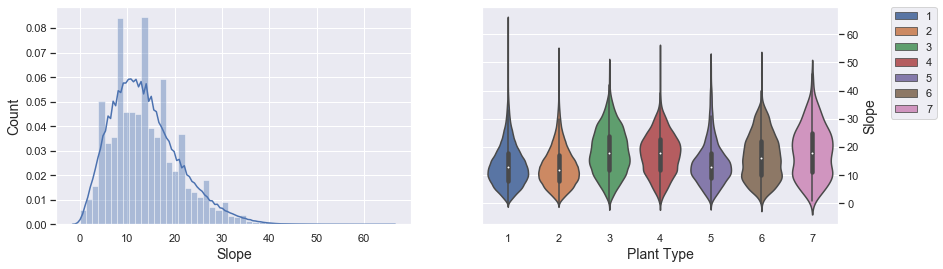

In [45]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Slope'], ax = axes[0])
axes[0].set_xlabel('Slope', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Slope', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Slope', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [46]:
data["Slope"].skew()

0.7706495494558014

In [47]:
np.cbrt(data["Slope"]+100).skew()

0.6494705324820921

As we can see the skew is reduced, we apply transformation function on skew attribute.

In [48]:
data["Slope"] = np.cbrt(data["Slope"]+100)

-> Percentage of data loss=  1.5612115638423225


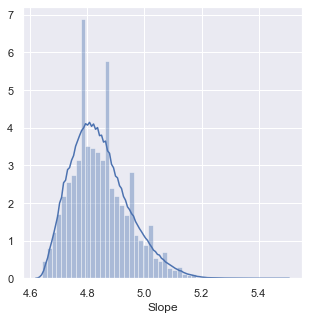

In [49]:
q1, q2, q3 = data['Slope'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['Slope']<Min]
data_outliers = pd.concat([data_outliers, data[data['Slope']>Max]])
no_outlier_data = data[data['Slope']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['Slope']<Max]
print("-> Percentage of data loss= ", len(data_outliers['Slope'])*100/len(data['Slope']))
sns.distplot(data['Slope'])

In [50]:
data = no_outlier_data.copy()

#### Distance_To_Water_Source

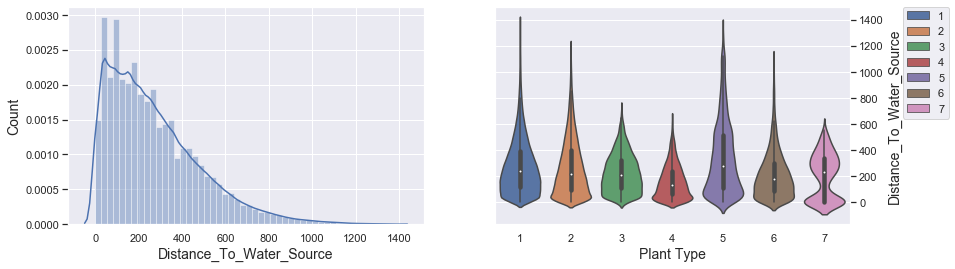

In [51]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Distance_To_Water_Source'], ax = axes[0])
axes[0].set_xlabel('Distance_To_Water_Source', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Distance_To_Water_Source', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Distance_To_Water_Source', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [52]:
data["Distance_To_Water_Source"].skew()

1.1110572788276907

In [53]:
np.cbrt(data["Distance_To_Water_Source"]+100).skew()

0.2823532234701505

clear reduction in skew.Apply Skew function.

In [54]:
data["Distance_To_Water_Source"] = np.cbrt(data["Distance_To_Water_Source"]+100)

-> Percentage of data loss=  0.1205985460800981


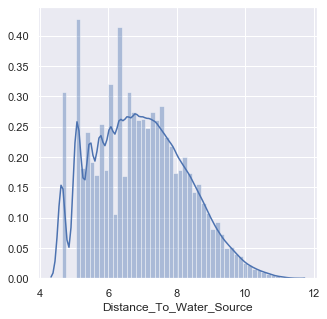

In [55]:
q1, q2, q3 = data["Distance_To_Water_Source"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Distance_To_Water_Source"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Distance_To_Water_Source"]>Max]])
no_outlier_data = data[data["Distance_To_Water_Source"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Distance_To_Water_Source"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Distance_To_Water_Source"])*100/len(data["Distance_To_Water_Source"]))
sns.distplot(data['Distance_To_Water_Source'])

In [56]:
data = no_outlier_data.copy()

#### Standing_Distance_To_Water_Source

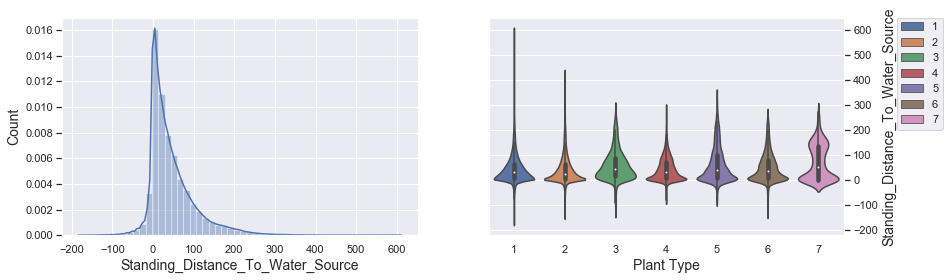

In [57]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Standing_Distance_To_Water_Source'], ax = axes[0])
axes[0].set_xlabel('Standing_Distance_To_Water_Source', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Standing_Distance_To_Water_Source', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Standing_Distance_To_Water_Source', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [58]:
data["Standing_Distance_To_Water_Source"].skew()

1.7535101700569766

In [59]:
np.cbrt(data["Standing_Distance_To_Water_Source"]+100).skew()

-1.140796616839881

In [60]:
data["Standing_Distance_To_Water_Source"] = np.cbrt(data["Standing_Distance_To_Water_Source"]+100)

-> Percentage of data loss=  3.6670698967041564


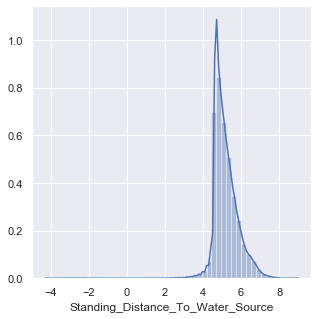

In [61]:
q1, q2, q3 = data["Standing_Distance_To_Water_Source"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Standing_Distance_To_Water_Source"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Standing_Distance_To_Water_Source"]>Max]])
no_outlier_data = data[data["Standing_Distance_To_Water_Source"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Standing_Distance_To_Water_Source"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Standing_Distance_To_Water_Source"])*100/len(data["Standing_Distance_To_Water_Source"]))
sns.distplot(data['Standing_Distance_To_Water_Source'])

In [62]:
data = no_outlier_data.copy()

#### Distance_To_Road

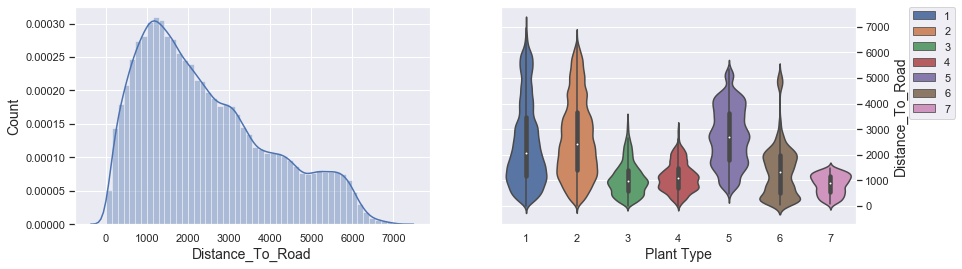

In [63]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Distance_To_Road'], ax = axes[0])
axes[0].set_xlabel('Distance_To_Road', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Distance_To_Road', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Distance_To_Road', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [64]:
data["Distance_To_Road"].skew()

0.6689282303990496

In [65]:
np.cbrt(data[col]+100).skew()

-0.8447078864493021

In [66]:
data["Distance_To_Road"] = np.cbrt(data["Distance_To_Road"]+100)

-> Percentage of data loss=  0.0


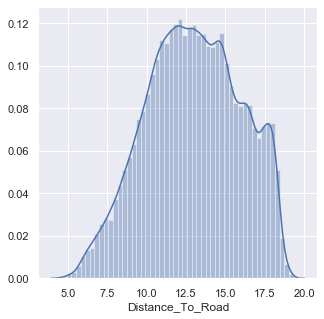

In [67]:
q1, q2, q3 = data["Distance_To_Road"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Distance_To_Road"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Distance_To_Road"]>Max]])
no_outlier_data = data[data["Distance_To_Road"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Distance_To_Road"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Distance_To_Road"])*100/len(data["Distance_To_Road"]))
sns.distplot(data['Distance_To_Road'])

In [68]:
data = no_outlier_data.copy()

#### Shadow_In_Morning

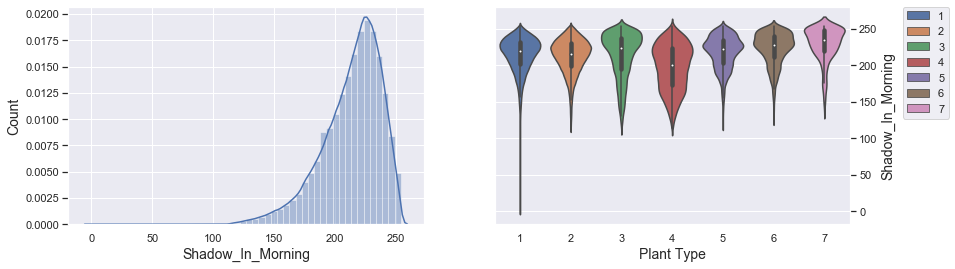

In [69]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Shadow_In_Morning'], ax = axes[0])
axes[0].set_xlabel('Shadow_In_Morning', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Shadow_In_Morning', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Shadow_In_Morning', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [70]:
data['Shadow_In_Morning'].skew()

-0.9397976357854944

In [71]:
np.cbrt(data['Shadow_In_Morning']+100).skew()

-1.1111396561990161

skew is increasing, so do not apply function.

-> Percentage of data loss=  2.3401558703461216


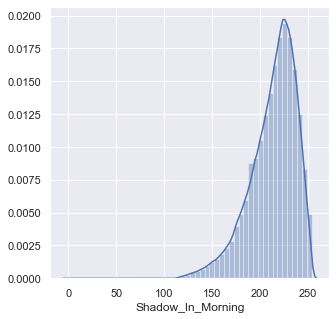

In [72]:
q1, q2, q3 = data["Shadow_In_Morning"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Shadow_In_Morning"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Shadow_In_Morning"]>Max]])
no_outlier_data = data[data["Shadow_In_Morning"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Shadow_In_Morning"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Shadow_In_Morning"])*100/len(data["Shadow_In_Morning"]))
sns.distplot(data['Shadow_In_Morning'])

In [73]:
data = no_outlier_data.copy()

#### Shadow_In_Midday

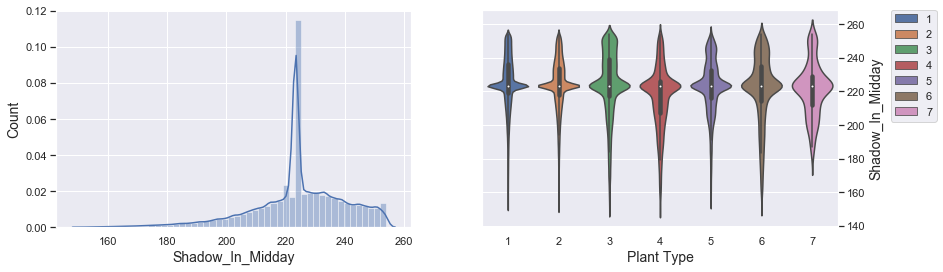

In [74]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Shadow_In_Midday'], ax = axes[0])
axes[0].set_xlabel('Shadow_In_Midday', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Shadow_In_Midday', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Shadow_In_Midday', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [75]:
data['Shadow_In_Midday'].skew()

-0.7588072016892273

In [76]:
np.cbrt(data['Shadow_In_Midday']+100).skew()

-0.9030715303993161

In [77]:
data['Shadow_In_Midday']=np.cbrt(data['Shadow_In_Midday']+100)

-> Percentage of data loss=  4.585965339968022


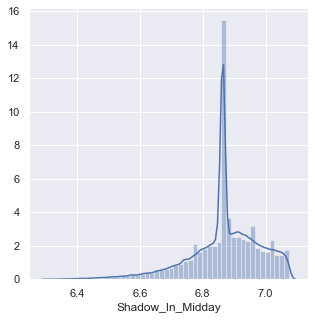

In [78]:
q1, q2, q3 = data["Shadow_In_Midday"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Shadow_In_Midday"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Shadow_In_Midday"]>Max]])
no_outlier_data = data[data["Shadow_In_Midday"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Shadow_In_Midday"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Shadow_In_Midday"])*100/len(data["Shadow_In_Midday"]))
sns.distplot(data['Shadow_In_Midday'])

In [79]:
data = no_outlier_data.copy()

#### Shadow_In_Evening

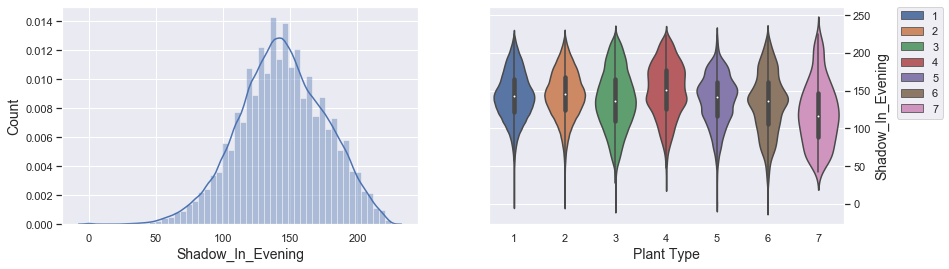

In [80]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Shadow_In_Evening'], ax = axes[0])
axes[0].set_xlabel('Shadow_In_Evening', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Shadow_In_Evening', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Shadow_In_Evening', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [81]:
data["Shadow_In_Evening"].skew()

-0.13567859262318988

In [82]:
np.cbrt(data["Shadow_In_Evening"]+100).skew()

-0.4140878670801442

-> Percentage of data loss=  0.3935183445677686


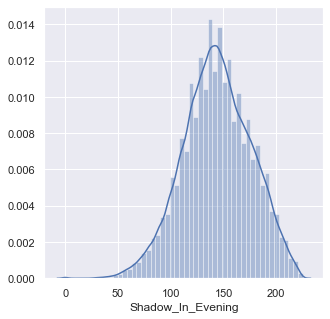

In [83]:
q1, q2, q3 = data["Shadow_In_Evening"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Shadow_In_Evening"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Shadow_In_Evening"]>Max]])
no_outlier_data = data[data["Shadow_In_Evening"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Shadow_In_Evening"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Shadow_In_Evening"])*100/len(data["Shadow_In_Evening"]))
sns.distplot(data['Shadow_In_Evening'])

In [84]:
data = no_outlier_data.copy()

#### Distance_To_Fire

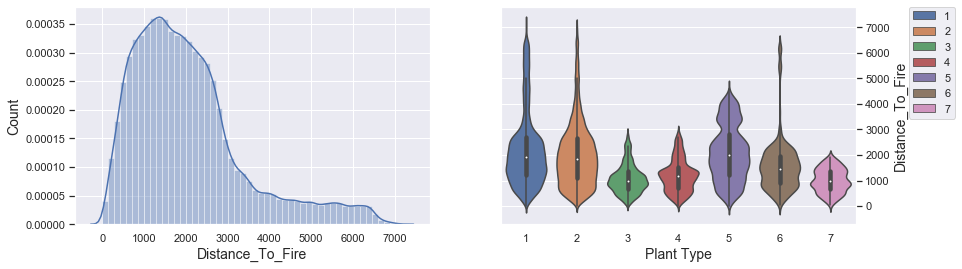

In [85]:
f, axes = plt.subplots(1,2,figsize=(14,4))

sns.distplot(data['Distance_To_Fire'], ax = axes[0])
axes[0].set_xlabel('Distance_To_Fire', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].yaxis.tick_left()

sns.violinplot(x = 'Plant_Type', y = 'Distance_To_Fire', data = data, hue = 'Plant_Type', dodge = False, ax = axes[1])
axes[1].set_xlabel('Plant Type', fontsize=14)
axes[1].set_ylabel('Distance_To_Fire', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()

In [86]:
data["Distance_To_Fire"].skew()

1.225566401177785

In [87]:
np.cbrt(data["Distance_To_Fire"]+100).skew()

0.15395931425805037

In [88]:
data["Distance_To_Fire"] = np.cbrt(data["Distance_To_Fire"]+100)

-> Percentage of data loss=  0.2629049868924882


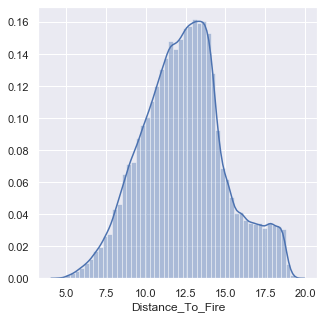

In [89]:
q1, q2, q3 = data["Distance_To_Fire"].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data["Distance_To_Fire"]<Min]
data_outliers = pd.concat([data_outliers, data[data["Distance_To_Fire"]>Max]])
no_outlier_data = data[data["Distance_To_Fire"]>Min]
no_outlier_data = no_outlier_data[no_outlier_data["Distance_To_Fire"]<Max]
print("-> Percentage of data loss= ", len(data_outliers["Distance_To_Fire"])*100/len(data["Distance_To_Fire"]))
sns.distplot(data['Distance_To_Fire'])

In [90]:
data = no_outlier_data.copy()

In [91]:
data.head()

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
0,2984,5.718479,4.791420,6.938232,5.451362,15.604908,235,6.868285,119,14.179657,29,1,1
2,3357,6.415069,4.848808,8.954503,6.307994,11.472524,232,7.006796,140,12.527407,32,3,2
3,2787,7.191966,4.876999,6.299605,5.192494,12.854391,176,7.000000,206,10.186500,31,3,1
4,3011,6.171006,4.672329,8.776383,5.798890,17.810775,222,6.965820,151,11.754261,29,1,1
5,3063,7.380323,4.834588,7.824294,5.167649,14.006799,183,6.938232,190,11.205503,31,3,1


### Normalization

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
mms = MinMaxScaler()

In [94]:
data[["Heigh_From_Sea_Level","Aspect","Slope","Distance_To_Water_Source","Standing_Distance_To_Water_Source","Distance_To_Road",
"Shadow_In_Morning",
"Shadow_In_Midday",
"Shadow_In_Evening",
"Distance_To_Fire"]] = mms.fit_transform(data[["Heigh_From_Sea_Level","Aspect","Slope","Distance_To_Water_Source","Standing_Distance_To_Water_Source","Distance_To_Road",
"Shadow_In_Morning",
"Shadow_In_Midday",
"Shadow_In_Evening",
"Distance_To_Fire"]])

In [95]:
test_data[["Heigh_From_Sea_Level","Aspect","Slope","Distance_To_Water_Source","Standing_Distance_To_Water_Source","Distance_To_Road",
"Shadow_In_Morning",
"Shadow_In_Midday",
"Shadow_In_Evening",
"Distance_To_Fire"]] = mms.fit_transform(test_data[["Heigh_From_Sea_Level","Aspect","Slope","Distance_To_Water_Source","Standing_Distance_To_Water_Source","Distance_To_Road",
"Shadow_In_Morning",
"Shadow_In_Midday",
"Shadow_In_Evening",
"Distance_To_Fire"]])

In [96]:
data.sample(5)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Neighbourhood_Type,Plant_Type
372375,0.510249,0.544136,0.554120,0.571549,0.510839,0.297386,0.84,0.745141,0.398810,0.549810,33,3,1
214240,0.746706,0.853482,0.068303,0.310086,0.373908,0.898021,0.60,0.503998,0.630952,0.223271,38,1,2
42502,0.414348,0.979847,0.332917,0.673337,0.682782,0.560424,0.48,0.515457,0.613095,0.329011,11,3,6
209662,0.759151,0.867746,0.267999,0.641291,0.502372,0.736578,0.43,0.761303,0.738095,0.432866,39,1,2
174573,0.539531,0.496910,0.235239,0.741715,0.763020,0.502555,0.77,0.728948,0.488095,0.554659,32,3,1


### 2nd problem statement where we need to predict the species of plant which will survive in the neighborhood of a given environment.

#### One hot encoding for neighbourhood

In [97]:
data = pd.get_dummies(data, prefix_sep= "__", 
                       columns = ['Neighbourhood_Type'])

In [104]:
data.sample(5)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Plant_Type,Neighbourhood_Type__1,Neighbourhood_Type__2,Neighbourhood_Type__3,Neighbourhood_Type__4
247340,0.299414,0.125067,0.169102,0.068651,0.358864,0.534300,0.64,0.581745,0.535714,0.909667,29,1,1,0,0,0
336131,0.650073,0.388805,0.365082,0.140033,0.358864,0.633393,0.85,0.515457,0.339286,0.478250,31,2,0,0,1,0
164878,0.775256,0.826526,0.615694,0.867169,0.906469,0.372341,0.13,0.825633,0.934524,0.325794,22,2,0,1,0,0
426011,0.466325,0.963111,0.523070,0.268322,0.610336,0.932665,0.31,0.381225,0.660714,0.830874,24,1,1,0,0,0
284964,0.573206,0.560296,0.169102,0.703335,0.476458,0.496222,0.72,0.793531,0.547619,0.616612,29,1,1,0,0,0


In [99]:
test_data = pd.get_dummies(test_data, prefix_sep= "__", 
                         columns = ['Neighbourhood_Type'])

In [105]:
test_data.sample(5)

,Heigh_From_Sea_Level,Aspect,Slope,Distance_To_Water_Source,Standing_Distance_To_Water_Source,Distance_To_Road,Shadow_In_Morning,Shadow_In_Midday,Shadow_In_Evening,Distance_To_Fire,Turf,Plant_Type,Neighbourhood_Type__1,Neighbourhood_Type__2,Neighbourhood_Type__3,Neighbourhood_Type__4
14341,0.430297,0.775000,0.075758,0.077309,0.216252,0.224986,0.814961,0.944882,0.682540,0.573128,12,1,1,0,0,0
32452,0.611978,0.488889,0.151515,0.292054,0.251638,0.205734,0.889764,0.968504,0.603175,0.100210,13,1,0,0,1,0
55427,0.585808,0.980556,0.136364,0.214746,0.293578,0.152754,0.803150,0.881890,0.626984,0.242267,31,1,0,0,1,0
11218,0.620030,0.980556,0.212121,0.150322,0.233290,0.254637,0.767717,0.842520,0.619048,0.122603,31,2,0,0,1,0
69133,0.453951,0.900000,0.181818,0.107373,0.255570,0.231591,0.740157,0.889764,0.706349,0.273478,29,1,1,0,0,0


In [101]:
neighbours=data.loc[:,'Neighbourhood_Type__1': 'Neighbourhood_Type__4']

In [106]:
for col in neighbours:
    count=neighbours[col].value_counts()
    print(col,count)

Neighbourhood_Type__1 0    204794
1    191643
Name: Neighbourhood_Type__1, dtype: int64
Neighbourhood_Type__2 0    375306
1     21131
Name: Neighbourhood_Type__2, dtype: int64
Neighbourhood_Type__3 0    225022
1    171415
Name: Neighbourhood_Type__3, dtype: int64
Neighbourhood_Type__4 0    384189
1     12248
Name: Neighbourhood_Type__4, dtype: int64


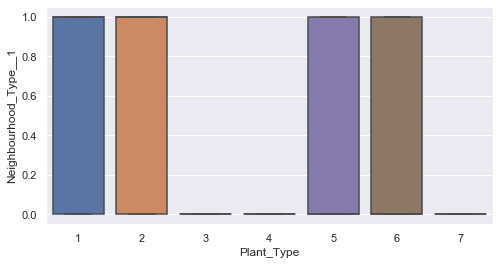

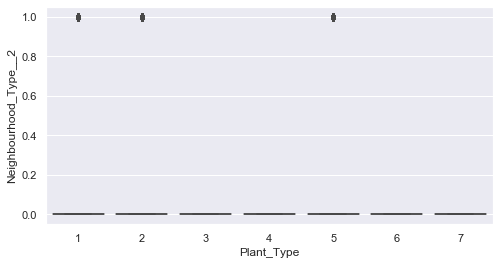

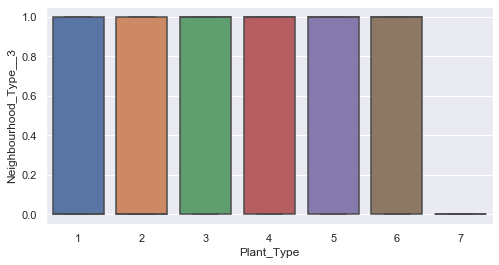

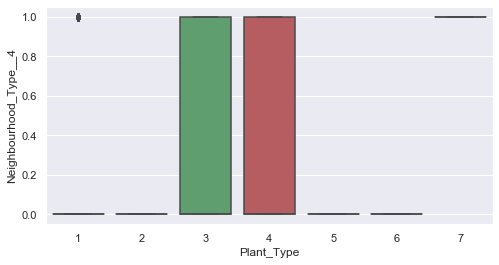

In [107]:
 for i, col in enumerate(neighbours.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Plant_Type'], y=col, data=data)

Neighbourhood and suitable Plant Types:

Neighbourhood-1:Assassin vine,Ascomoid,Myconid,Hangman tree.

Neighbourhood-2:Assassin vine,Ascomoid and Myconid

Neighbourhood-3:All Plant Types except Dark Tree
 
Neighbourhood-4:Assassin vine,Basidirond,Kelpie,Dark tree


In [108]:
data['Plant_Type'].value_counts()

1    201627
2    150503
3     15812
5     13326
4      8487
6      6077
7       605
Name: Plant_Type, dtype: int64

### Splitting data Into Input and Output format

In [109]:
X_train=data.loc[:,'Heigh_From_Sea_Level':'Neighbourhood_Type__4']
Y_train=data['Plant_Type']
X_test=test_data.loc[:,'Heigh_From_Sea_Level':'Neighbourhood_Type__4']
Y_test=test_data['Plant_Type']

In [110]:
from sklearn.metrics import accuracy_score

### Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [112]:
print(X_train.shape)

(396437, 16)


In [113]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(Y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(Y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  1.0
Test set:  1.0


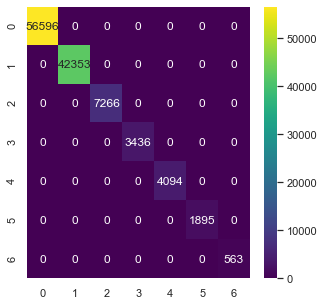

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56596
           2       1.00      1.00      1.00     42353
           3       1.00      1.00      1.00      7266
           4       1.00      1.00      1.00      3436
           5       1.00      1.00      1.00      4094
           6       1.00      1.00      1.00      1895
           7       1.00      1.00      1.00       563

    accuracy                           1.00    116203
   macro avg       1.00      1.00      1.00    116203
weighted avg       1.00      1.00      1.00    116203



In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
sns.heatmap(confusion_matrix(Y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(Y_test,y_pred_nb_test))

### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [116]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# classifier_rf = RandomForestClassifier()

# steps = [
#     ('scalar', StandardScaler()),
#     ('model', RandomForestClassifier())
# ]
# rf_pipe = Pipeline(steps)

In [117]:
# parameters =  { "model__n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#                 "model__max_features": ["auto", "sqrt"],
#                 "model__max_depth": np.linspace(10, 110, num = 11),
#                 "model__min_samples_split": [2, 5, 10],
#                 "model__min_samples_leaf": [1, 2, 4],
#                 "model__bootstrap": [True, False],
#                 "model__criterion": ["gini"],
#                 "model__random_state" : [42] }
            
# clf = RandomizedSearchCV(estimator = rf_pipe,
#                                   param_distributions = parameters,
#                                   n_iter = 100,
#                                   cv = 3,
#                                   random_state=42,
#                                   verbose = 4,
#                                   n_jobs = -1)
#clf = clf.fit(X_train, y_train.ravel())


In [118]:
clf = RandomForestClassifier()

In [119]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
y_pred_rf_train = clf.predict(X_train)
accuracy_rf_train = accuracy_score(Y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = clf.predict(X_test)
accuracy_rf_test = accuracy_score(Y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.9999053380721669


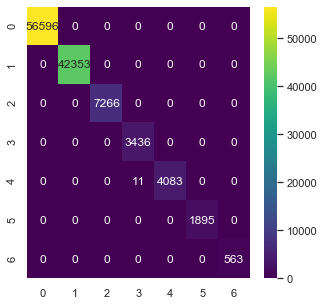

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56596
           2       1.00      1.00      1.00     42353
           3       1.00      1.00      1.00      7266
           4       1.00      1.00      1.00      3436
           5       1.00      1.00      1.00      4094
           6       1.00      1.00      1.00      1895
           7       1.00      1.00      1.00       563

    accuracy                           1.00    116203
   macro avg       1.00      1.00      1.00    116203
weighted avg       1.00      1.00      1.00    116203



In [121]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(Y_test,y_pred_rf_test))

### Knn

In [122]:
# Fitting classifier to the Training set
# from sklearn.neighbors import KNeighborsClassifier
# classifier_knn = KNeighborsClassifier()
# steps = [
#     ('scalar', StandardScaler()),
#     ('model', KNeighborsClassifier())
# ]
# knn_pipe = Pipeline(steps)

In [123]:
# parameters = { 'model__algorithm' : ['brute'],
#                'model__leaf_size' : [30,50,70,90,110],
#                'model__metric' : ['minkowski'],
#                'model__p' : [1],
#                'model__n_neighbors' : [3,5,11,19],
#                'model__weights' : ['uniform', 'distance'],
#                'model__n_jobs' : [-1]
# }
# classifier_knn = GridSearchCV(knn_pipe, parameters, iid=False, cv = 3)
# classifier_knn = classifier_knn.fit(X_train, y_train)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [125]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [126]:
y_pred_knn_train = knn.predict(X_train)
accuracy_knn_train = accuracy_score(Y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = knn.predict(X_test)
accuracy_knn_test = accuracy_score(Y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  0.999992432593325
Test set:  0.9996901973270914


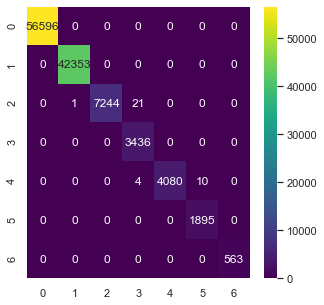

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     56596
           2       1.00      1.00      1.00     42353
           3       1.00      1.00      1.00      7266
           4       0.99      1.00      1.00      3436
           5       1.00      1.00      1.00      4094
           6       0.99      1.00      1.00      1895
           7       1.00      1.00      1.00       563

    accuracy                           1.00    116203
   macro avg       1.00      1.00      1.00    116203
weighted avg       1.00      1.00      1.00    116203



In [127]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(Y_test,y_pred_knn_test))

# Final Recommendation

From all the statictics that we derived it is quite evident that,Naive Bayes works well on the Given Data Set.

# Limitations and things that could have been done

Hyperparameter tuning is something that i was not able to do,even though i know how to implement it,as my system specifications could not support building such a large model.As a result i had to take K=5 in KNN algorithm, and I have replaced Null values in Shadow_In_Midday with the mean. This approch is highly used,but usually it incorporates bias in the data.One way of handling it would be using KNN algorithm. Another way can be deriving a linear expression for Shadow_In_Midday in terms of slope and Shadow_In_Evening as from the correlation matrix it is evident that they are highly correlated. As we can see, from correlation matrix, some of the attributes are highly correlated. So PCA could be used in order to reduce Dimentions.